## Исследование данных о российском кинопрокате



Задача нашего исследования - изучить рынок российского кинопроката и выявить тренды на нем. Отдельное внимание нужно уделить фильмам, получившим господдержку. Нам необходимо выяснить, насколько такие фильмы интересны зрителю. 

Мы будем работать с открытыми данными Минкультуры, которые содержат информацию о прокатных удостоверениях, сборах и господдержке фильмов, а также использовать информацию с Кинопоиска.

Для этого нам нужно будет объедининть в одну таблицу данные о фильмах и прокате в кинотеатрах. Далее вы сделаем предобработку данных: изучим таблицу на предмет пропусков, дубликатов, просмотрим проблемы в категориальных и количественных столбцах.

Затем мы проведем анализ данных. Изучим количество фильмов, выходивших в прокат по годам, суммы сборов, возрастные ограничения. Отдельно рассмотрим фильмы, получившие господдержку.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Откроем оба файла методом read_csv. Нам нужно соединить две таблицы по общему столбцу puNumber, но он имеет разный формат - object в одной и int - в другой. В столбце data_movies['puNumber'] встречается значение 'нет'. Установим для метода to_numeric параметр errors=‘coerce’, чтобы заменить 'нет' на NaN. Теперь оба столбца записаны в числовом виде. Можно объединить две таблицы.

Здесь будут необходимые библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим две таблицы:
- data_movies - данные кинопоиска
- data_shows - данные о прокате в кинотеатрах

Выведем первые пять строк каждой таблицы и информацию о них

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [5]:
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [6]:
data_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [7]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [8]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В обеих таблицах есть общий столбец puNumber, но тип данных в нем отличается. Если в data_show это int, то в data_movies - object. В также в стоблце puNumber таблицы data_movies есть одно значение 'нет'. В строке об этом фильме нет почти никаких данных, кроме названия, режиссера, студии и т.д., которые никак не помогут нам в анализе, поэтому эту строку можно удалить.

In [9]:
data_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

In [10]:
data_movies[data_movies['puNumber'] == 'нет'].count()

title                    1
puNumber                 1
show_start_date          1
type                     1
film_studio              1
production_country       1
director                 1
producer                 1
age_restriction          1
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
dtype: int64

In [11]:
data_movies[data_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_movies = data_movies[data_movies['puNumber'] != 'нет']

In [13]:
data_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '226019110',
       '231001012', '231001111'], dtype=object)

In [14]:
data_movies['puNumber'].count()

7485

Остальное переведем в числовой формат и приведем к типу int, так в таблице data_shows

In [15]:
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='raise')
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

In [16]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [17]:
data_movies['puNumber'].sort_values().unique()

array([  1811096, 111000110, 111000111, ..., 226019110, 231001012,
       231001111])

In [18]:
data_movies['puNumber'].count()

7485

Объединим таблицы так, чтобы в новую вошли данные, которые есть хотя бы в одной из двух. Выведем первые пять строк и информацию о новой таблице. 

In [19]:
data = data_movies.merge(data_shows, on='puNumber', how='outer')

In [20]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Посмотрим еще раз на типы данных в новой таблице. На первый взгляд преобразовать тип данных нужно в столбцах show_start_date и ratings.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Первый переведем в формат to_datetime.

In [23]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
#data.head()

Во втором случае данные о рейтинге представлены в формате object. Их нужно перевести в числовой формат.

In [24]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [25]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, nan])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Изучим пропуски в таблице. Как мы видим, в отдельных столбцах пропусков достаточно много.

In [26]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

В столбце puNumber один пропуск. От него можно избавиться, и поменять тип данных с float на int.

In [27]:
data = data.dropna(subset=['puNumber'])
#data['puNumber'].isna().sum()

data['puNumber'] = data['puNumber'].astype('int')

Мы можем удалить до 10% датафрейма без потери качества исследования. Поэтому аналогично поступим с пропусками в столбцах film_studio, production_country и director, где их относительно немного. Можно посмотреть все эти данные в википедии и заполнить самостоятельно, но пока в этом нет смысла.

In [28]:
data = data.dropna(subset=['film_studio'])
data = data.dropna(subset=['production_country'])
data = data.dropna(subset=['director'])
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   976
genres                    956
box_office               4303
dtype: int64

В столбце producer достаточно много пропусков. Возможно, в этих случаях имя продюсера не имеет большого значения. Опять-таки можно сделать это вручную, но зачем. Проще заменить nan на пустую строку.

In [29]:
data['producer'] = data['producer'].fillna(value='')
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   976
genres                    956
box_office               4303
dtype: int64

Столбец refundable_support рассказывает нам об объёме возвратных средств государственной поддержки. Минимальное значение в нем равно нулю. Можем предположить, что там, где пропуски, такой поддержки не было. Но чтобы не путать их с фильмами, где один и или оба вида поддержки были нулевыми, оставим эти пропуски без изменений. К тому же по каким-то фильмам данные о поддержке могут просто отсутствовать, хотя она была.

Аналогично поступим с пропусками в столбце nonrefundable_support.

In [30]:
data['refundable_support'].min()

0.0

In [31]:
data['refundable_support'].max()

180000000.0

In [32]:
data['nonrefundable_support'].min()

0.0

In [33]:
data['nonrefundable_support'].max()

400000000.0

По той же причине оставим пропуски в столбце с бюджетом.

In [35]:
data['budget'].min()

0.0

In [36]:
data['budget'].max()

2305074303.0

In [37]:
data.query('budget == 0').count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

В таблице указано три источника госфинансирования фильма: Минкультры, Фонд кино и совместно Минкультры и Фонд кино. В остальных случаях стоят пропуски. Очевидно, они появились из-за того, что в таблице фильмы из разных стран. И не все российские фильмы сняты с госфинансированием. Заменим пропуски на пустую строку.

In [39]:
data['financing_source'].sort_values().unique()
data['financing_source'] = data['financing_source'].fillna(value='')

В значении рейтинга пропуски заменить нечем (только опять-таки искать и вписывать руками). Поэтому пропуски оставляем.

In [40]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, nan])

Пропуски в жанрах также заменим пропуски на пустые строки

In [41]:
data['genres'].sort_values()
data['genres'] = data['genres'].fillna(value='')

В столбце box_office мы также не может подобрать однозначную замену всем пропускам, поэтому оставим их без изменений.

In [42]:
data['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Рассмотрим дубликаты в столбце названий фильмов. Всего найдено 713 дубликатов.

Фильм "День святого Валентина_" повторяется 5 раз. Во всех случаях год выхода в прокат 2010, отличаются только месяц и день. Мы не знаем точно, что значит show_start_date. Возможно, речь идет о разных городах и платформах.

In [43]:
data['title'].duplicated().sum()
data['title'].sort_values().value_counts()
#data[data['title'] == 'День святого Валентина_']
#data[data['title'] == 'Шерлок Холмс']
#data = data.drop_duplicates(subset=['title'], keep='first')

День святого Валентина_                  5
Лузеры                                   4
Код доступа "Кейптаун"                   4
Кошки против собак: Месть Китти Галор    4
Кошмар на улице Вязов /Фильм ужасов/     4
                                        ..
ШПИОН                                    1
Робин Гуд: Начало                        1
Человек-Паук: Вдали от дома              1
Своя республика                          1
Снежная Королева 2: Перезаморозка        1
Name: title, Length: 6745, dtype: int64

Мы нашли два повтора в номерах прокатных удостоверений. В первом случае названия и все остальное совпадает, кроме рейтинга, что можно объяснить данными с разных сервисов. В другом - по одному прокатному номеру записаны разные фильмы с совпадающими датами премьер.

Мы нашли два повтора в номерах прокатных удостоверений.

In [44]:
data['puNumber'].duplicated().sum()

2

В первом случае, два разных фильма с похожими названиями (фильм 5067 - сиквел фильма 5066), но данные записаны верно только для первого, во втором были уже другие продюсеры. Следовательно, мы можем удалить фильм 5067.

In [45]:
data.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,,6.80,"комедия,криминал",NaN


In [46]:
data = data.drop(index=5067)

Заодно исправим вторую букву в имени. Заменим 'Э' на 'э'.

In [47]:
data.loc[data['puNumber'] == 221054410, 'director'] = 'Хэрольд Рэмис'
data.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,Хэрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.40,"комедия,криминал",NaN


Во втором случае под одним прокатным номером действительно записаны два разных фильма. Посмотрим на этот срез чуть шире.

In [48]:
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.60,"драма,мелодрама,история",NaN


Выглядит так, будто просто нарушена очередность, и в фильме 4637 надо заменить прокатный номер на 221154210

In [49]:
data.loc[4636:4641]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4636,Мгла /По произведению Стивена Кинга/,221154110,2010-12-17 12:00:00,Художественный,"Дарквудс Продакшнз, Дименшн Филмз, Вайнштейн К...",США,Фрэнк Дарабонт,"Алиса М.Кантроу, Карен М.Мерфи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.60,"ужасы,триллер,фантастика",NaN
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.60,"драма,мелодрама,история",NaN
4639,Игорь,221154410,2010-12-17 12:00:00,Анимационный,Эксодус Продакшнз,США - Франция,Энтони Леондис,"Джон Д.Ираклис, Макс Ховард",«12+» - для детей старше 12 лет,NaN,NaN,NaN,,5.90,"мультфильм,фэнтези,комедия",NaN
4640,Затащи меня в ад,221154510,2010-12-17 12:00:00,Художественный,"Бакаро Интертейнмент, Хост Хауз ПИкчерз, Манда...",США,Сэм Рэйми,"Джошуа Донен, Джозеф Дрэйк, Грант Кертис",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,6.10,"ужасы,комедия,фэнтези",NaN
4641,Дюплекс,221154610,2010-12-17 12:00:00,Художественный,"Флауэр Филмс, Рэд Ауэр Филмс",США,Дэнни ДеВито,"Дрю Берримор, Бен Стиллер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,,7.10,комедия,NaN


In [50]:
data.loc[data['title'] == 'Как жениться и остаться холостым', 'puNumber'] = 221154210
data.loc[4636:4641]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4636,Мгла /По произведению Стивена Кинга/,221154110,2010-12-17 12:00:00,Художественный,"Дарквудс Продакшнз, Дименшн Филмз, Вайнштейн К...",США,Фрэнк Дарабонт,"Алиса М.Кантроу, Карен М.Мерфи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.60,"ужасы,триллер,фантастика",NaN
4637,Как жениться и остаться холостым,221154210,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.60,"драма,мелодрама,история",NaN
4639,Игорь,221154410,2010-12-17 12:00:00,Анимационный,Эксодус Продакшнз,США - Франция,Энтони Леондис,"Джон Д.Ираклис, Макс Ховард",«12+» - для детей старше 12 лет,NaN,NaN,NaN,,5.90,"мультфильм,фэнтези,комедия",NaN
4640,Затащи меня в ад,221154510,2010-12-17 12:00:00,Художественный,"Бакаро Интертейнмент, Хост Хауз ПИкчерз, Манда...",США,Сэм Рэйми,"Джошуа Донен, Джозеф Дрэйк, Грант Кертис",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,6.10,"ужасы,комедия,фэнтези",NaN
4641,Дюплекс,221154610,2010-12-17 12:00:00,Художественный,"Флауэр Филмс, Рэд Ауэр Филмс",США,Дэнни ДеВито,"Дрю Берримор, Бен Стиллер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,,7.10,комедия,NaN


Во всех остальных столбцах данные могут совпадать, это выглядит нормально.

Полностью повтояющиеся строки отсутствуют.

In [53]:
data.duplicated().sum()

0

Так как мы удаляли некоторые значения из таблицы, наверное, стоит сбросить индекс)

In [54]:
data.reset_index(drop=True)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,,NaN,,NaN
7453,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,5.40,"боевик,триллер",NaN
7454,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,,NaN,,NaN
7455,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,,NaN,,NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Для удобства снова выведем информацию о таблице

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   puNumber               7457 non-null   int64         
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7457 non-null   object        
 5   production_country     7457 non-null   object        
 6   director               7457 non-null   object        
 7   producer               7457 non-null   object        
 8   age_restriction        7457 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7457 non-null   object        
 13  rat

В столбцах titile и type уберем пробелы в начале и конце строки, а также приведем названия фильмов к нижнему регистру, так как в некоторые названия написаны как попало (например, заглавные буквы могут встречаться в середине слова), и это усложнит анализ.

In [56]:
data['title'].sort_values().unique()
data['title'] = data['title'].str.strip().str.lower()
data['title'].sort_values().unique()

array(['"sos" над тайгой', '"v" значит вендетта',
       '"артишок" анимационный альманах авторских фильмов', ..., 'ёлки 5',
       'ёлки новые', 'ёлки последние'], dtype=object)

In [57]:
data['type'].sort_values().unique()
data['type'] = data['type'].str.strip().str.lower()
data['type'].sort_values().unique()

array(['анимационный', 'документальный', 'музыкально-развлекательный',
       'научно-популярный', 'прочие', 'художественный'], dtype=object)

В названиях студий также уберем пробелмы в начале и конце строки, и здесь также есть смысл убрать все заглавные буквы, потому что, судя по всему, написание одних и тех же студий может быть разным.

In [58]:
data['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], dtype=object)

Теперь мы видим, что даже в нижнем регистре написания одной студии могу различаться. Не уверен, что это нужно исправлять прямо здесь. Пока оставим как есть.

In [59]:
data['film_studio'] = data['film_studio'].str.strip().str.lower()
data['film_studio'].sort_values().unique()

array(['"дино де лаурентиис" (италия) при участии киностудии "мосфильм"',
       '"союздетфильм", "мосфильм", "москинокомбинат"',
       '"студия "птица феникс" татьяны новиковой', ..., 'яш радж фильмс',
       'яш раи фильм', 'яш рай фильм'], dtype=object)

Выведем список уникальных значений стран. Здесь видно сразу несколько проблем. Первая - это пробелы в начале и конце строки. Сразу уберем их.

In [60]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [61]:
data['production_country'] = data['production_country'].str.strip()
data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

После этого нам видны два странных значения: 'CША' и '2019'. В первом случае буква C - латинская, заменим название на кириллицу. Во втором, в столбце с названием страны записан год выхода фильма. Можно заменить это вручную.

In [62]:
data[data['production_country'] == 'CША']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6183,девица,121018918,2018-09-13 12:00:00,художественный,"строфик продакшнс лимитед, грит пойнт медиа",CША,"Дэвид Зеллнер, Нейтан Зеллнер","Роберт Кристофер Ольсон, Дэвид Зеллнер, Нейтан...",«18+» - запрещено для детей,NaN,NaN,NaN,,5.80,"драма,комедия,вестерн","1,133,848.00"


In [63]:
data['production_country'] = data['production_country'].str.replace('CША', 'США')

In [64]:
data[data['production_country'] == '2019']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,дело коллини,121027219,2019-09-19 12:00:00,художественный,"константин филм, глобал скрин, севен пикчерз сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,7.40,"детектив,драма,криминал",NaN


In [65]:
data.loc[data['production_country'] == '2019', 'production_country'] = 'Германия'

Также видим несколько проблем с разделением стран там, где их несколько. Можно привести к виду, который встретится дальше в столбце "genre" - разделить страны запятой без пробелов. Из этого можно будет при необходимости выделить нужную страну.

In [66]:
data['production_country'] = data['production_country'].str.replace('-', ',')
data['production_country'] = data['production_country'].str.replace(' ', '')

In [67]:
data['production_country'].sort_values().unique()

array(['Австралия', 'Австралия,Великобритания',
       'Австралия,Великобритания,Бельгия,Индия', 'Австралия,Германия',
       'Австралия,Ирландия', 'Австралия,Канада', 'Австралия,Колумбия',
       'Австралия,США', 'Австралия,Турция,США', 'Австрия',
       'Австрия,Великобритания,Германия', 'Австрия,Германия',
       'Австрия,Германия,Франция', 'Австрия,Люксембург',
       'Австрия,Франция,Германия', 'Азербайджан,Россия', 'Аргентина',
       'Аргентина,Бразилия', 'Аргентина,Испания',
       'Аргентина,Испания,Уругвай',
       'Аргентина,Мексика,Бразилия,Франция,США',
       'Аргентина,Уругвай,Россия,Германия,Франция,Нидерланды',
       'Аргентина,Франция,Испания', 'Армения', 'Армения,Германия',
       'Армения,Казахстан', 'Армения,Россия', 'Бельгия',
       'Бельгия,Великобритания,США',
       'Бельгия,Германия,Канада,Франция,США,Великобритания',
       'Бельгия,Германия,Люксембург',
       'Бельгия,Германия,Люксембург,Франция',
       'Бельгия,Испания,Канада,Нидерланды', 'Бельгия,Итали

Аналогично, уберем пробелы в именах режиссеров и продюсеров.

In [68]:
data['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [69]:
data['director'] = data['director'].str.strip()

In [70]:
data['director'].sort_values().unique()

array(['Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [71]:
data['producer'].sort_values().unique()

array(['', ' А.Шальопа', ' Г.Шпригов', ...,
       'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
       'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез'], dtype=object)

In [72]:
data['producer'] = data['producer'].str.strip()

In [73]:
data['producer'].sort_values().unique()

array(['', '"Фонд Михаила Калатозова"',
       'Ёсиаки Нисимура, Джеффри Уэкслер', ...,
       'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
       'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез'], dtype=object)

В следующих строках проблем с пробелами нет.

In [74]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [75]:
data['financing_source'].sort_values().unique()

array(['', 'Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино'], dtype=object)

In [76]:
data['genres'].sort_values().unique()

array(['', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,

Во многих категориальных колонках встречается общая проблема - пробелы в начале и конце строки. Также мы в некоторых случаях привели строки к нижнему регистру. Встречаются различные написания студий, стран. Пока это не влияет на анализ, оставим их без изменений.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Не уверен, что до конца понял это задание. Но большинство столбцов с количественными значениями не имеют проблем с данными. Вопросы могут возникуть по трем столбцам - budget, refundable_support и nonrefundable_support. Мы может предположить, что значения refundable_support и nonrefundable_support не могут быть больше бюджета фильма. Чтобы проверить это, сложим значения refundable_support и nonrefundable_support и сравним их со значениями столбца budget. Значений, которые превышали бы бюджет, не найдено.

Выведем максимальные значения бюджета, возвратной и невозвратной господдержкой. На первый взгляд, все нормально. Сумма максимальных значений поддержки не превышает максимальную сумму бюджета.

In [78]:
data['budget'].max()

2305074303.0

In [79]:
data['refundable_support'].max()

180000000.0

In [80]:
data['nonrefundable_support'].max()

400000000.0

Сложим построчно деньги господдержки и создадит для этой суммы отдельный столбец.

In [83]:
data['support_sum'] = data.loc[:, ['refundable_support', 'nonrefundable_support']].sum(axis=1)

In [84]:
data['support_sum'].max()

500000000.0

Найдем строки, где эта сумма превышает значение общего бюджета.

In [85]:
data.query('support_sum > budget').count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   17
box_office               17
support_sum              17
dtype: int64

Выведем эти 17 строк. Во всех случаях общий бюджет равен нулю, отмечены только суммы господдержки. Можно предположить, что такие фильмы были целиком сняты на госденьги, и нули в бюджете можно заменить на сумму госденег.

In [86]:
data.query('support_sum > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_sum
2052,14+,111023614,2014-12-19 12:00:00,художественный,"ооо киностудия ""сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10","23,000,000.00"
2057,дуxless 2,111000415,2015-01-26 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00","75,000,000.00"
2471,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40","80,000,000.00"
2531,бармен.,111009615,2015-05-26 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80","20,000,000.00"
2614,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40","160,000,000.00"
2683,тряпичный союз,111010215,2015-06-08 12:00:00,художественный,"ооо ""кинокомпания ""коктебель""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51","59,000,000.00"
2787,срочно выйду замуж,111017115,2015-09-30 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20","35,000,000.00"
2873,помню - не помню!,111004916,2016-03-01 12:00:00,художественный,"ооо ""кинофирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43","6,000,000.00"
3046,любовь с ограничениями,111008216,2016-04-29 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00","70,000,000.00"
3564,притяжение (2016),111018116,2016-12-16 12:00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00","250,000,000.00"


Выведем еще раз инфо таблицы и построим гистограммы для каждого числового значения.

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   puNumber               7457 non-null   int64         
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7457 non-null   object        
 5   production_country     7457 non-null   object        
 6   director               7457 non-null   object        
 7   producer               7457 non-null   object        
 8   age_restriction        7457 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7457 non-null   object        
 13  rat

Из предварительных гистограмм мы можем следующие выводы:
1. количество выпускаемых фильмов в целом равномерно распределено по годам, но есть отдельные выбросы
2. суммы возвратно господдержки небольшие
3. суммы невозвратной господдержки в большинстве также до 0,5, но есть отдельные высокие значения
4. рейтинг фильмов сконцентрирован между значениями 6-8

array([[<AxesSubplot:title={'center':'puNumber'}>,
        <AxesSubplot:title={'center':'show_start_date'}>,
        <AxesSubplot:title={'center':'refundable_support'}>],
       [<AxesSubplot:title={'center':'nonrefundable_support'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'ratings'}>],
       [<AxesSubplot:title={'center':'box_office'}>,
        <AxesSubplot:title={'center':'support_sum'}>, <AxesSubplot:>]],
      dtype=object)

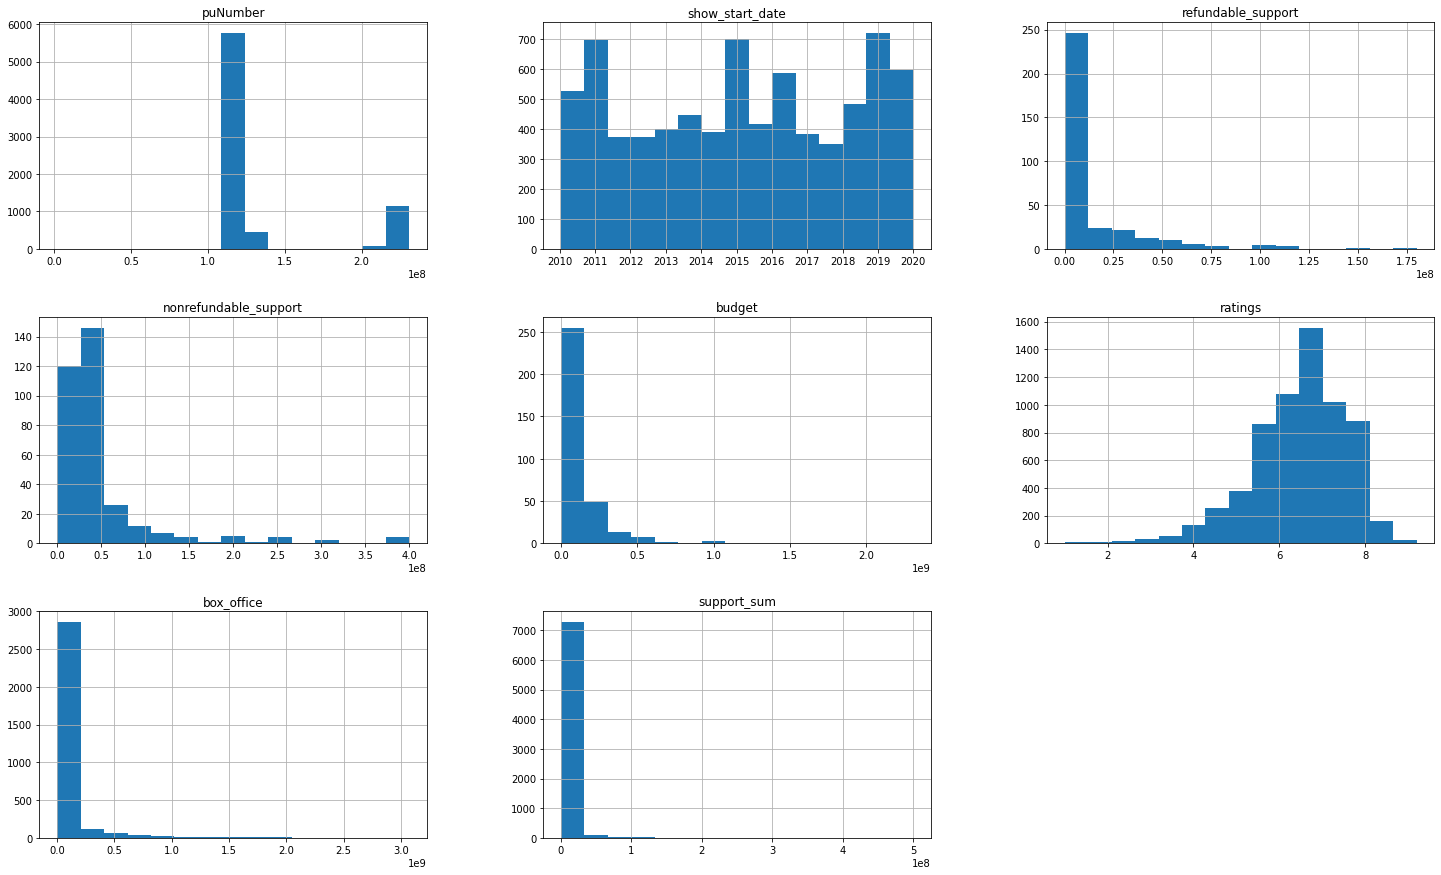

In [88]:
data.hist(bins=15, figsize=(25, 15))

Рассмотрим столбец с номерами прокатных удостоверений. Хоть имеет числовой формат, но по факту относится к качественным значениям. На общей гистограмме видет разрыв в значениях в середине. Но какую-то очевидную логику в этом найти сложно.

<AxesSubplot:>

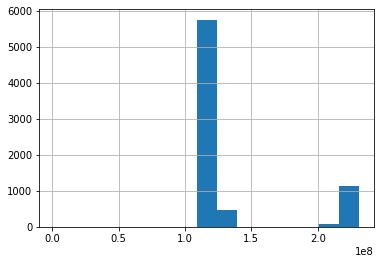

In [89]:
data['puNumber'].hist(bins=15)

In [90]:
data['puNumber'].sort_values() 

4700      1811096
3961    111000110
4767    111000111
729     111000112
1128    111000113
          ...    
1884    226014714
4354    226017410
3991    226019110
1011    231001012
5248    231001111
Name: puNumber, Length: 7457, dtype: int64

In [91]:
data[data['puNumber'] < 150000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_sum
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,,6.60,"драма,военный",NaN,0.00
5,остановился поезд,111013816,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",СССР,В.Абдрашитов,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,,7.70,драма,NaN,0.00
6,любовь и голуби,111007013,2013-10-18 12:00:00,художественный,"киностудия ""мосфильм""",СССР,В.Меньшов,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,,8.30,"мелодрама,комедия","2,700.00",0.00
8,отпетые мошенники.,121011416,2016-05-05 12:00:00,художественный,"пульсар продюксьон, тф1 фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,,8.00,"комедия,криминал",NaN,0.00
9,отпуск за свой счет,111019114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм"", телевидение внр","СССР,Венгрия",В.Титов,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,,7.80,"мелодрама,комедия",NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,прочие,севен артс продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,,NaN,,NaN,0.00
7481,звериная ярость,121037819,2019-12-24 12:00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,5.40,"боевик,триллер",NaN,0.00
7482,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,художественный,"никелодеон анимейшн студиос, спин мастер","США,Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,,NaN,,NaN,0.00
7483,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","РеспубликаКипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,,NaN,,NaN,0.00


In [92]:
data[data['puNumber'] > 200000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_sum
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,,7.20,"боевик,драма,мелодрама",NaN,0.00
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.80,"фантастика,боевик,триллер",NaN,0.00
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.80,"фантастика,боевик,триллер",NaN,0.00
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.80,"фантастика,боевик,триллер",NaN,0.00
7,любовь и сигареты,221074614,2014-12-29 12:00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,,6.60,"мюзикл,мелодрама,комедия",NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,люблю,217001218,2019-01-14 12:00:00,прочие,круглов алексей владимирович,Россия,А.Круглов,А.Круглов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,,7.00,"мелодрама,комедия",NaN,0.00
6734,одна ложь на двоих,211003119,2019-03-01 12:00:00,художественный,"ооо ""студия телемастер""",Россия,А.Праздников,Р.Павлючик,«12+» - для детей старше 12 лет,NaN,NaN,NaN,,5.60,драма,NaN,0.00
6779,священная роща чувашского кинематографа,211005319,2019-03-21 12:00:00,художественный,ип ибрагимов рустем решитович,Россия,С.Алякимова,Ю.Сергеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,,NaN,,NaN,0.00
7052,смерш. продолжение (умирать приказа не было),211033619,2019-07-07 12:00:00,художественный,"ооо ""стар медиа дистрибьюшн""",Россия,О.Фомин,"ООО ""Стар Медиа Дистрибьюшн"", ОАО ""ТРК ВС РФ ""...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,6.80,"детектив,боевик,история",NaN,0.00


Выделяется количество фильмов в 2010 г. С 2014 г. выпуск в целом стабильно растет за исключением провала в 2017 г.

<AxesSubplot:>

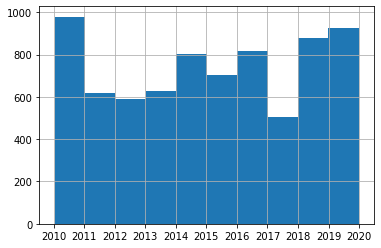

In [93]:
data['show_start_date'].hist(bins=10)

При этом есть несколько выбросов, в основном под конец года. Может это объясняется более удачными датами для релизов.

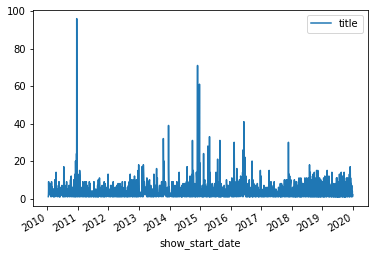

In [94]:
data_date = data.pivot_table(index='show_start_date', values='title', aggfunc='count').plot()

В столбце с возвратной поддержкой много значений равны нулю. Посчитаем, сколько у нас таких.

In [95]:
data['refundable_support'].describe()

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Их оказалось 221 из 332 числовых.

In [96]:
data[data['refundable_support'] == 0].count()

title                    221
puNumber                 221
show_start_date          221
type                     221
film_studio              221
production_country       221
director                 221
producer                 221
age_restriction          221
refundable_support       221
nonrefundable_support    221
budget                   221
financing_source         221
ratings                  206
genres                   221
box_office               209
support_sum              221
dtype: int64

Рассмотрим отдельно ненулевые значения. Как видно из гистограммы, значительная доля фильмов получает поддержку менее 25 млн руб., что является средним значением. Медианная сумма - 35,5 млн руб. Минимальное значение - 3,5 млн руб. Какие-то фильмы умудряются получить больше 100 млн руб.

In [97]:
data_nonnull_ref = data[data['refundable_support'] > 0]

In [98]:
data_nonnull_ref['refundable_support'].describe()

count           111.00
mean     35,486,486.49
std      31,972,875.36
min       3,500,000.00
25%      15,000,000.00
50%      25,000,000.00
75%      50,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

<AxesSubplot:>

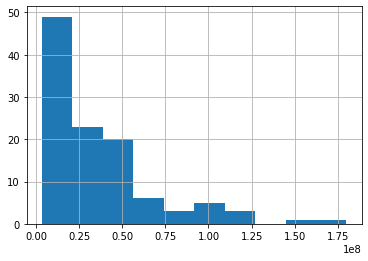

In [99]:
data_nonnull_ref['refundable_support'].hist()

Похожая ситуация в столбце невозвратной поддержки, но значения более ровно распределились по квантилям за счет того, что в выборке достаточно много очень больших сумм (максимальная - 400 млн руб.), и в целом ненулевых значений больше.

In [100]:
data['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

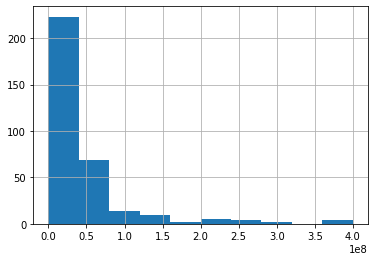

In [101]:
data['nonrefundable_support'].hist()

In [102]:
data[data['nonrefundable_support'] == 0].count()

title                    9
puNumber                 9
show_start_date          9
type                     9
film_studio              9
production_country       9
director                 9
producer                 9
age_restriction          9
refundable_support       9
nonrefundable_support    9
budget                   9
financing_source         9
ratings                  9
genres                   9
box_office               9
support_sum              9
dtype: int64

По анализу данных господдержки фильмов можно сделать вывод, что фильмы чаще получают невозвратную поддержку. И через нее предоставляются гораздо большие суммы.

В бюджете сразу избавимся от нулевых значений.

In [103]:
data['budget'].describe()

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

Среднее значение бюджета фильма получилось равным 60 млн руб., медианное - 35 млн руб. Где-то между ними, судя по гистограмме, и расположилось основное количество фильмов. Самые дорогие картины представлены в небольших (единичных) количествах.

In [104]:
nonnull_budget = data[data['budget'] != 0]
nonnull_budget['budget'].describe()

count             315.00
mean      134,096,082.35
std       191,226,039.63
min        14,462,464.00
25%        46,153,866.50
50%        73,379,554.00
75%       150,004,286.50
max     2,305,074,303.00
Name: budget, dtype: float64

<AxesSubplot:>

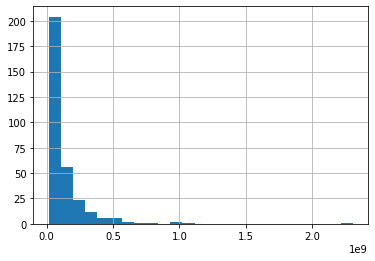

In [105]:
nonnull_budget['budget'].hist(bins=25)

Среднее значение рейтинга фильма примерно совпадает с медианным. Зрители довольно часто оценивают фильмы в 6,5-6,6 баллов. Есть и совсем низкие оценки.

In [106]:
data['ratings'].describe()

count   6,481.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

<AxesSubplot:>

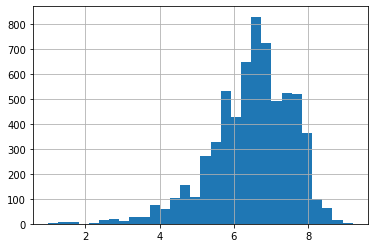

In [107]:
data['ratings'].hist(bins=30)

Фильмов с рейтингом ниже 2 не так уж и мало. Вот этот - "взломать блогеров" - в свое время даже неплохо пошумел)

In [108]:
data[data['ratings'] < 2]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_sum
515,ночь в супермаркете,124001212,2012-05-02 12:00:00,анимационный,"си 47 продакшнз, лайнс гейт фэмили интертейнме...",США,Лоуренс Казанофф,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,,1.60,"мультфильм,комедия,семейный",620.00,0.00
1025,большая ржака,111003512,2012-07-23 12:00:00,художественный,"ооо ""авеста филмс""",Россия,В.Москаленко,"Р.Арзуманов, В.Малый",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,1.40,комедия,"87,795.00",0.00
1226,зомби каникулы,111001213,2013-03-29 12:00:00,художественный,"ооо студия ""новая волна""",Россия,К.Кемниц,С.Торчилин,«18+» - запрещено для детей,NaN,NaN,NaN,,1.50,"ужасы,триллер,комедия",NaN,0.00
1468,черная роза,111004014,2014-04-16 12:00:00,художественный,"ооо ""кинокомпания царь"", hollywood storm",Россия,А.Невский,А.Невский,«16+» - для детей старше 16 лет,NaN,NaN,NaN,,1.50,"детектив,триллер,криминал",380.00,0.00
1472,джастин бибер: believe,126003716,2016-06-07 12:00:00,прочие,"дольфин филмз, бибер тайм филмз, скутер браун ...",США,Джон М.Чу,"Джастин Бибер, Скутер Браун, Стюарт Форд",«6+» - для детей старше 6 лет,NaN,NaN,NaN,,1.60,"концерт,музыка,документальный",NaN,0.00
1473,джастин бибер: believe,126004813,2013-12-11 12:00:00,прочие,"дольфин филмз, бибер тайм филмз, скутер браун ...",США,Джон М.Чу,"Джастин Бибер, Скутер Браун, Стюарт Форд",«6+» - для детей старше 6 лет,NaN,NaN,NaN,,1.60,"концерт,музыка,документальный",NaN,0.00
1535,кавказ.,111009413,2013-11-26 12:00:00,художественный,"юнайтед мультимедиа проджектс, метрополь","Азербайджан,Россия",Фарид Гумбатов,"Рауф Атамалибеков, Фарид Гумбатов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,,1.10,комедия,NaN,0.00
1691,7 главных желаний,111009113,2013-11-19 12:00:00,художественный,"ооо тпо ""рок""",Россия,В.Соколовский,"А.Учитель, К.Саксаганская",«12+» - для детей старше 12 лет,NaN,NaN,NaN,,1.60,"мелодрама,комедия","6,380.00",0.00
3373,дизлайк,111012516,2016-08-05 12:00:00,художественный,"ооо ""ангел""",Россия,П.Руминов,"П.Руминов, И.Капитонов",«18+» - запрещено для детей,NaN,NaN,NaN,,1.50,ужасы,"11,066,749.18",0.00
3514,взломать блогеров,111016616,2016-10-28 12:00:00,художественный,"ооо ""таббак""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","36,016,269.00",Фонд кино,1.00,"комедия,мультфильм,фантастика","7,323,648.00","25,000,000.00"


В выборке кассовых сборов есть нулевые значения, но их не очень много. Как мы видим, разброс сумм большой. В среднем фильм собирает 76,6 млн руб., но медианное значение составляет 2,3 млн руб. А максимальная сумма из выборки - 3,1 млрд руб.

In [109]:
data['box_office'].describe()

count           3,155.00
mean       76,551,328.80
std       240,455,853.44
min                 0.00
25%            87,090.50
50%         2,338,049.90
75%        23,995,460.84
max     3,073,568,690.79
Name: box_office, dtype: float64

In [110]:
data[data['box_office'] == 0].count()

title                    24
puNumber                 24
show_start_date          24
type                     24
film_studio              24
production_country       24
director                 24
producer                 24
age_restriction          24
refundable_support        0
nonrefundable_support     0
budget                    0
financing_source         24
ratings                  19
genres                   24
box_office               24
support_sum              24
dtype: int64

<AxesSubplot:>

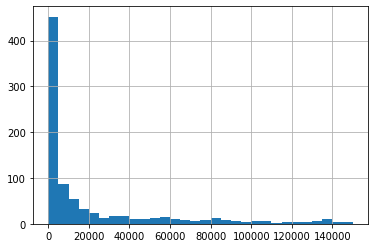

In [111]:
data['box_office'].hist(bins=30, range=(0, 150000))

#### Шаг 2.6. Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [112]:
data['show_start_year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [113]:
def get_first_value(row):
    row_list = row.split(',')[0]
    return row_list
data['main_director'] = data['director'].apply(get_first_value)
data['main_genre'] = data['genres'].apply(get_first_value)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [114]:
data['state_support_share'] = data['support_sum'] / data['budget']
data[data['state_support_share'] > 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support_sum,show_start_year,main_director,main_genre,state_support_share
1281,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,0.33
1448,бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,,"28,140.00","26,000,000.00",2014,А.Якимчук,,0.70
1498,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,0.61
1524,берцы,111004314,2014-05-05 12:00:00,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,братья ч,111004414,2014-04-23 12:00:00,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,союз спасения,111022019,2019-12-26 12:00:00,художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",2019,А.Кравчук,история,0.51
7465,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00",2019,Д.Шмидт,мультфильм,0.53
7473,вторжение,111022519,2019-12-23 12:00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,"500,000,000.00",2019,Ф.Бондарчук,фантастика,0.53
7475,я свободен,111023019,2019-12-26 12:00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,NaN,"30,000,000.00",2019,И.Северов,драма,0.65


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Посчитаем какое количество фильмов присутствует в данных по годам. Отдельно посчитаем фильмы, показанные в кинотеатрах (находятся в столбце box_office), а также долю таких фильмов относительно общего количества.

Из полученной таблицы можно сделать вывод, что рост количества фильмов в кинотеатрах существенно превышал рост количества выпускаемых фильмов. В результате, если не брать в расчет 2010 г., в котором количество фильмов выбивается из общего ряда, то доля кинопроката выросла с 18% до почти 60%.

In [115]:
data.groupby('show_start_year').count()
data_release = data.pivot_table(index='show_start_year', values=['title', 'box_office'], aggfunc='count')
data_release['share'] = data_release['box_office'] / data_release['title']
data_release

,box_office,title,share
show_start_year,,,
2010,105,979,0.11
2011,109,620,0.18
2012,127,592,0.21
2013,184,629,0.29
2014,279,805,0.35
2015,465,705,0.66
2016,525,817,0.64
2017,357,505,0.71
2018,474,879,0.54


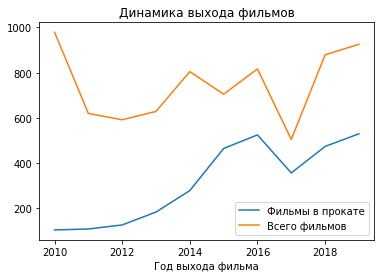

In [116]:
data_release.plot(title='Динамика выхода фильмов', y=['box_office', 'title'], legend=True)
plt.xlabel('Год выхода фильма')
plt.legend(['Фильмы в прокате', 'Всего фильмов'])

Text(0.5, 0, 'Год')

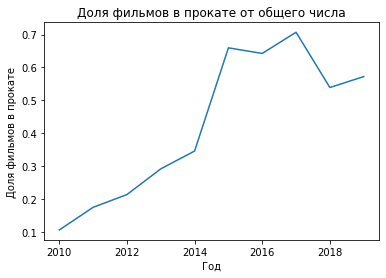

In [117]:
data_release.plot(title='Доля фильмов в прокате от общего числа', y='share', legend=False)
plt.ylabel('Доля фильмов в прокате')
plt.xlabel('Год')

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Для 2010-2014 гг в данных указано меньше значений box_office, чтобы делать выводы по сравнению с более поздними годами. Но с 2015 по 2019 гг сборы в целом росли. Мы также расчитали, какая сумма приходилась в среднем на один фильм в год.
Если рассматривать только данные за 2015-2019 гг., то минимальную кассу собрал 2015 г., наиболее удачным оказался 2018 г.

Для 2010-2014 гг в данных указано меньше значений box_office, чтобы делать выводы по сравнению с более поздними годами. Но с 2015 по 2019 гг сборы в целом росли. 

Если рассматривать только данные за 2015-2019 гг., то минимальную кассу собрал 2015 г. - 39,5 млрд руб., а максимальная была в 2018 г. - 49,7 млрд руб.

In [118]:
data_money = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['count' , 'sum'])
#data_money['sum'] = data_money['sum'] / 1000000
data_money

,count,sum
,box_office,box_office
show_start_year,,
2010,105,"2,428,654.00"
2011,109,"14,102,765.00"
2012,127,"6,911,073.00"
2013,184,"29,799,706.20"
2014,279,"7,444,951,859.20"
2015,465,"39,497,365,196.40"
2016,525,"47,866,105,214.91"
2017,357,"48,563,707,217.51"


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

При этом в среднем на фильм сборы были выше в 2017 г. - 136 млн руб. А минимальные (если рассматривать 2015-2019 гг.) - в 2016 г. и составили 3,9 млн руб.

In [119]:
data_money = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean' , 'median'])
#data_money['mean'] = data_money['mean'] / 1000000
#data_money['median'] = data_money['median'] / 1000000
data_money

,mean,median
,box_office,box_office
show_start_year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,417.90","5,560.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,173,533.74","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Из представленных данных можно сделать вывод, что возрастная категория действительно имеет значения для кассовых сборов. Меньшие деньги приносят фильмы для любой зрительской аудитории. Наиболее популярными являются фильмы для категорий от 12 и от 16 лет. Стабильно хорошие цифры показывают фильмы 18+ и для детей старше 6 лет.

В целом за все годы наибольшую кассу собрали фильмы для категории 16+.
Сумма сборов фильмов для любой аудитории снижалась. Возможно, это связанно с ужесточением законодательства в РФ, и все больше фильмов попадали под какие-либо возрастные ограничения.

In [120]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [121]:
data_age = data.pivot_table(index=['show_start_year', 'age_restriction'], values='box_office', aggfunc='sum')
data_age

box_office
show_start_year age_restriction                                         
2010            «0+» - для любой зрительской аудитории      1,887,611.00
                «12+» - для детей старше 12 лет               120,146.00
                «16+» - для детей старше 16 лет               366,512.00
                «18+» - запрещено для детей                    54,385.00
2011            «0+» - для любой зрительской аудитории     13,499,871.00
                «12+» - для детей старше 12 лет               219,891.00
                «16+» - для детей старше 16 лет               381,513.00
                «18+» - запрещено для детей                     1,040.00
                «6+» - для детей старше 6 лет                     450.00
2012            «0+» - для любой зрительской аудитории      2,222,133.00
                «12+» - для детей старше 12 лет               108,734.00
                «16+» - для детей старше 16 лет             3,254,216.00
                «18+» - запрещено для детей                   182,580.00
                «6+» - для детей старше 6 лет               1,143,410.00
2013            «0+» - для любой зрительской аудитории      2,710,302.50
                «12+» - для детей старше 12 лет            20,910,336.50
                «16+» - для детей старше 16 лет               658,069.60
                «18+» - запрещено для детей                 5,161,245.60
                «6+» - для детей старше 6 лет                 359,752.00
2014            «0+» - для любой зрительской аудитории    375,562,258.20
                «12+» - для детей старше 12 лет         2,584,782,324.00
                «16+» - для детей старше 16 лет           544,280,086.70
                «18+» - запрещено для детей             2,209,712,746.90
                «6+» - для детей старше 6 лет           1,730,614,443.40
2015            «0+» - для любой зрительской аудитории    379,054,578.37
                «12+» - для детей старше 12 лет        13,616,082,008.91
                «16+» - для детей старше 16 лет        11,368,120,870.27
                «18+» - запрещено для детей             5,432,308,367.44
                «6+» - для детей старше 6 лет           8,701,799,371.41
2016            «0+» - для любой зрительской аудитории    150,034,321.67
                «12+» - для детей старше 12 лет        12,204,446,524.39
                «16+» - для детей старше 16 лет        16,664,548,541.74
                «18+» - запрещено для детей             6,793,929,818.87
                «6+» - для детей старше 6 лет          12,053,146,008.24
2017            «0+» - для любой зрительской аудитории    229,598,930.00
                «12+» - для детей старше 12 лет         7,851,427,660.67
                «16+» - для детей старше 16 лет        18,745,042,900.06
                «18+» - запрещено для детей             9,651,495,581.02
                «6+» - для детей старше 6 лет          12,086,142,145.76
2018            «0+» - для любой зрительской аудитории     32,449,002.11
                «12+» - для детей старше 12 лет        14,267,250,435.69
                «16+» - для детей старше 16 лет        16,503,602,346.96
                «18+» - запрещено для детей             8,760,085,501.15
                «6+» - для детей старше 6 лет          10,104,974,623.41
2019            «0+» - для любой зрительской аудитории     17,746,066.82
                «12+» - для детей старше 12 лет        12,680,198,773.67
                «16+» - для детей старше 16 лет        12,753,418,984.60
                «18+» - запрещено для детей            10,121,796,303.64
                «6+» - для детей старше 6 лет          12,852,548,650.86

In [123]:
data_age_sorted = data_age.query('show_start_year > 2014 and show_start_year < 2020')

In [124]:
data_age_sorted_box = data_age_sorted.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_age_sorted_box

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"808,882,898.97"
«12+» - для детей старше 12 лет,"60,619,405,403.33"
«16+» - для детей старше 16 лет,"76,034,733,643.63"
«18+» - запрещено для детей,"40,759,615,572.12"
«6+» - для детей старше 6 лет,"55,798,610,799.68"


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7484
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   puNumber               7457 non-null   int64         
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7457 non-null   object        
 5   production_country     7457 non-null   object        
 6   director               7457 non-null   object        
 7   producer               7457 non-null   object        
 8   age_restriction        7457 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7457 non-null   object        
 13  rat

Всего 332 фильмов из списка получили господдержку. Наибольшее число пришлось на 2015 - 86 фильмов.

In [127]:
data_state_support = data[data['financing_source'] != '']
data_state_support['show_start_year'].value_counts()

2015    86
2019    70
2016    61
2018    56
2017    41
2014    16
2013     2
Name: show_start_year, dtype: int64

In [128]:
data_state_support['show_start_year'].count()

332

<AxesSubplot:>

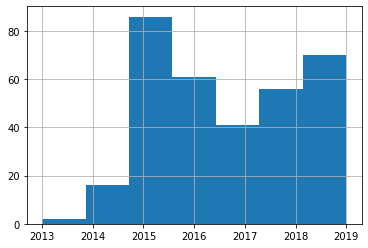

In [129]:
data_state_support['show_start_year'].hist(bins=7)

Как видно из графика, наибольшие суммы на фильм выделялись в 2016 и 2019 гг.

Text(0, 0.5, 'Распределение поддержки по фильмам')

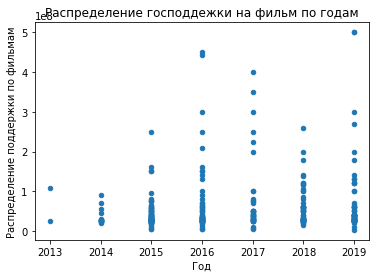

In [130]:
data_state_support.plot(title='Распределение господдежки на фильм по годам', x='show_start_year', y='support_sum', 
                        kind='scatter')
plt.xlabel('Год')
plt.ylabel('Распределение поддержки по фильмам')

За все время поддержку получил лишь один документальный фильм, а в основном художественные.

In [131]:
data_state_support_numbers = data_state_support.pivot_table(index=['show_start_year', 'type'], 
                                                            values='financing_source', aggfunc='count')
data_state_support_numbers

financing_source
show_start_year type                            
2013            художественный                 2
2014            анимационный                   1
                художественный                15
2015            анимационный                   7
                художественный                79
2016            анимационный                   5
                художественный                56
2017            анимационный                   5
                художественный                36
2018            анимационный                   8
                художественный                48
2019            анимационный                   5
                документальный                 1
                художественный                64

В течение 2015-2018 гг. господдержка фильмов была примерно на одном уровне - в целом выделяется ровность данных по этим годам как по бюджету, так и по господдержке. Доля государственных денег в общем бюджете фильма так же оставалась на сопоставимом уровне. Выделяется рост общего бюджета в 2019 г., при том что сумма выделенных государством денег выросла не так сильно.

In [132]:
data_state_support_sum = data_state_support.pivot_table(index='show_start_year', 
                                                        values=['support_sum', 'budget'], aggfunc='sum')
data_state_support_sum

,budget,support_sum
show_start_year,,
2013,"255,435,390.00","134,347,945.00"
2014,"1,279,484,783.00","572,002,299.00"
2015,"7,309,669,207.00","3,656,241,459.00"
2016,"7,228,942,748.00","4,303,155,482.00"
2017,"6,972,172,568.00","3,183,971,662.00"
2018,"6,651,694,634.00","3,446,969,465.00"
2019,"12,542,866,609.00","4,904,000,000.00"


In [133]:
data_state_support_sum['share'] = data_state_support_sum['support_sum'] / data_state_support_sum['budget']
data_state_support_sum

,budget,support_sum,share
show_start_year,,,
2013,"255,435,390.00","134,347,945.00",0.53
2014,"1,279,484,783.00","572,002,299.00",0.45
2015,"7,309,669,207.00","3,656,241,459.00",0.50
2016,"7,228,942,748.00","4,303,155,482.00",0.60
2017,"6,972,172,568.00","3,183,971,662.00",0.46
2018,"6,651,694,634.00","3,446,969,465.00",0.52
2019,"12,542,866,609.00","4,904,000,000.00",0.39


Найдем так же общую сумму выделенных государственными фондами денег.

In [134]:
data_state_support_sum['support_sum'].sum()

20200688312.0

Также можно посчитать корреляцию между выделяемой суммой поддержки и общим бюджетом. Она достаточно высокая, но это не означает прямой зависимости и что на боолее дешевые фильмы тратится пропорционально меньше денег.

In [135]:
data['support_sum'].corr(data['budget'])

0.7094372251423362

Из 322 фильмов, получивших господдержку, окупились 83.

In [136]:
data_state_support['profit'] = data_state_support['box_office'] / data_state_support['budget']
data_state_support[data_state_support['profit'] > 1]

/tmp/ipykernel_146/533860396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_state_support['profit'] = data_state_support['box_office'] / data_state_support['budget']


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support_sum,show_start_year,main_director,main_genre,state_support_share,profit
1869,а зори здесь тихие..._,111002915,2015-03-16 12:00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,Р.Давлетьяров,,«12+» - для детей старше 12 лет,"50,000,000.00",...,Фонд кино,8.50,"драма,военный,история","249,166,767.70","150,000,000.00",2015,Р.Давлетьяров,драма,0.68,1.13
1902,призрак_.,111001815,2015-03-02 12:00:00,художественный,"ооо ""водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,...,Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40","75,000,000.00",2015,А.Войтинский,триллер,0.54,2.53
1986,елки лохматые,111023114,2014-12-10 12:00:00,художественный,"ооо ""таббак""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,"26,000,000.00",...,Фонд кино,5.00,"семейный,комедия","121,225,633.80","56,000,000.00",2014,Максим Свешников,семейный,0.70,1.52
2004,снежная королева 2: перезаморозка,114000214,2014-11-13 12:00:00,анимационный,"ооо ""визарт фильм""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,"30,000,000.00",...,Фонд кино,6.50,"мультфильм,фэнтези,приключения","313,489,846.50","70,000,000.00",2014,А.Цицилин,мультфильм,0.28,1.24
2052,14+,111023614,2014-12-19 12:00:00,художественный,"ооо киностудия ""сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,...,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10","23,000,000.00",2014,А.Зайцев,мелодрама,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,верность,111009119,2019-06-13 12:00:00,художественный,"ооо ""друг друга"", ооо ""1-2-3 продакшн""",Россия,Н.Сайфуллаева,"С.Корнихин, В.Федорович, Е.Никишов, П.Лилиенфе...",«18+» - запрещено для детей,0.00,...,Министерство культуры,6.20,драма,"97,637,352.29","30,000,000.00",2019,Н.Сайфуллаева,драма,0.65,2.11
6990,давай разведемся!,111009519,2019-06-12 12:00:00,художественный,"ооо кинокомпания ""глобус-фильм""",Россия,А.Пармас,"С.Сельянов, К.Эрнст, Н.Дрозд-Макан",«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,5.90,комедия,"103,098,290.54","25,000,000.00",2019,А.Пармас,комедия,0.66,2.71
7452,фиксики против кработов,114004819,2019-12-21 12:00:00,анимационный,"ао ""аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,"80,000,000.00",...,Фонд кино,7.50,"мультфильм,детский,приключения","387,590,521.72","120,000,000.00",2019,В.Бедошвили,мультфильм,0.44,1.44
7455,холоп,111021719,2019-12-19 12:00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00",...,Фонд кино,6.80,комедия,"3,073,568,690.79","60,000,000.00",2019,К.Шипенко,комедия,0.38,19.21


Средний рейтинг фильмов с господдержкой 6.47. Для сравнения в целом по таблице средний рейтинг фильмов составляет 6,48. То есть нельзя сказать, что фильмы с господдержкой сильно отличаются по качеству от остальных. По годам распределение тоже достаточно ровное. Выделяется только значение в 2013 г. Если посмотреть на этот год отдельно, то оно получилось за счет фильма "Пока еще жива" с рейтингом 8.1. Лично я про него ничего не слышал)

In [137]:
data_state_support['ratings'].mean()
data['ratings'].mean()

6.478861286838451

In [138]:
data_state_support_rating = data_state_support.pivot_table(index='show_start_year', values='ratings', aggfunc='mean')
data_state_support_rating

,ratings
show_start_year,
2013,6.70
2014,6.01
2015,6.06
2016,5.68
2017,6.00
2018,6.00
2019,6.18


In [139]:
data_state_support[data_state_support['show_start_year'] == 2013]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support_sum,show_start_year,main_director,main_genre,state_support_share,profit
1281,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,0.33,0.00
1498,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,0.61,0.11


In [140]:
data_state_support = data_state_support[data_state_support['title'] != 'пока еще жива']

Больше всего денег на свои фильмы от госфондов получил Федор Бондарчук.

In [141]:
data_state_support_address = data_state_support.pivot_table(index='main_director', 
                                                            values='support_sum', aggfunc='sum')
data_state_support_address

,support_sum
main_director,
А Андрющенко,"75,000,000.00"
А.Аббасов,"53,000,000.00"
А.Аксененко,"90,000,000.00"
А.Амиров,"25,200,000.00"
А.Ананикян,"55,000,000.00"
...,...
Ю.Кулаков,"30,000,000.00"
Ю.Попович,"37,000,000.00"
Ю.Разыков,"40,000,000.00"


In [142]:
data_state_support_address.nlargest(5, 'support_sum')

,support_sum
main_director,
Ф.Бондарчук,"750,000,000.00"
Н.Хомерики,"660,000,000.00"
А.Кравчук,"500,000,000.00"
Р.Давлетьяров,"459,847,945.00"
А.Мизгирев,"450,000,000.00"


### Шаг 5. Напишите общий вывод

Мы провели исследование данных о российском рынке кинопроката. В нашем распоряжении были две таблицы с данными о фильмах из Кинопоиска и о самом прокате в кинотеатрах из открытых данных Минкультуры. 
Для этого мы объединили две таблицы, предварительно приведя данные в них к одному типу там, где это необходимо. 
Также мы рассмотрели пропуски в данных. Часть заменили на пустые строки, часть оставили без изменений. Обработали дубликаты. Рассмотрели корректность данных в качественных и количественных столбцах. Добавили несколько новых столбцов для анализа. 
Основные выводы:
1. Выделяется количество фильмов в 2010 г. С 2014 г. выпуск в целом стабильно растет за исключением провала в 2017 г. При этом есть несколько выбросов, в основном под конец года. Может это объясняется более удачными датами для релизов.
2. Суммы невозвратной поддержки существенно выше возвратной, и выделяется она чаще.
3. Среднее значение бюджета фильма получилось равным 60 млн руб., медианное - 35 млн руб.
4. Зрители довольно часто оценивают фильмы в 6,5-6,6 баллов.
5. В среднем фильм собирает 76,6 млн руб., но медианное значение составляет 2,3 млн руб. А максимальная сумма может достигать 3 млрд руб.
6. Доля кинопроката в общем выпуске неизменно росла до 2017 г. После стабилизировалась на уровне 55%.
7. Если рассматривать только данные за 2015-2019 гг. (которые более полно представлены), то минимальную кассу собрал 2015 г. - 39,5 млрд руб., а максимальная была в 2018 г. - 49,7 млрд руб. При этом в среднем на фильм сборы были выше в 2017 г. - 136 млн руб. А минимальные - в 2016 г. и составили 3,9 млн руб.
8. Возрастная категория фильма имеет значение. Наибольшую кассу собирают фильмы 16+. Сумма сборов фильмов для любой аудитории снижалась. Возможно, это связанно с ужесточением законодательства в РФ, и все больше фильмов попадали под какие-либо возрастные ограничения.
9. Всего 332 фильмов из списка получили господдержку. Наибольшее число пришлось на 2015 - 86 фильмов. Поддержку в основном получали художественные фильмы и всего один документальный.
10. Окупились только 83 фильма.
11. Наибольшие суммы на фильм выделялись в 2016 и 2019 гг.
12. В течение 2015-2019 гг. общие суммы господдержки и ее доля в бюджете фильма оставались на сопоставимом уровне. Выделяется рост общего бюджета в 2019 г., при том что сумма выделенных государством денег выросла не так сильно.
13. Средний рейтинг фильмов с господдержкой - 6,47, что почти не отличается от общего среднего значения.
14. Больше всего госсредств на свои фильмы получил Федор Бондарчук.